In [ ]:
# Install latest pre-release version of bigdl-chronos 
# Installing bigdl-chronos from pip will automatically install pyspark, bigdl, and their dependencies.
!pip install --pre --upgrade bigdl-chronos[all]
!pip uninstall -y torchtext # uninstall torchtext to avoid version conflict
exit() # restart the runtime to refresh installed pkg

In [1]:
import pandas as pd
import urllib.request
import json
import math

## Get data

In [4]:
f = open('data.json')
 
# returns JSON object as
# a dictionary
data = json.load(f)
 
# Iterating through the json
# list
with open('data.json', 'w') as f:
    json.dump(data['data'], f)

data = pd.read_json('data.json')
data

,code,date,time,floor,type,basicPrice,ceilingPrice,floorPrice,open,high,low,close,average,adOpen,adHigh,adLow,adClose,adAverage,nmVolume,nmValue,ptVolume,ptValue,change,adChange,pctChange
0,VCB,2022-01-20,14:44:39,HOSE,STOCK,86.8,92.8,80.8,85.2,87.5,83.1,87.1,85.664388,85.200,87.500,83.100,87.100,85.664388,2794300,239372000000,0,0,0.3,0.3000,0.3456
1,VCB,2022-01-19,15:01:02,HOSE,STOCK,87.6,93.7,81.5,87.5,87.5,85.0,86.8,86.330000,87.500,87.500,85.000,86.800,86.330000,914800,78972420000,500000,41500000000,-0.8,-0.8000,-0.9132
2,VCB,2022-01-18,15:01:03,HOSE,STOCK,86.2,92.2,80.2,85.5,87.6,84.0,87.6,86.350000,85.500,87.600,84.000,87.600,86.350000,1696600,146506850000,39000,3412500000,1.4,1.4000,1.6241
3,VCB,2022-01-17,15:01:03,HOSE,STOCK,83.4,89.2,77.6,83.0,88.0,82.3,86.2,85.640000,83.000,88.000,82.300,86.200,85.640000,2628500,225104290000,40030,3476541000,2.8,2.8000,3.3573
4,VCB,2022-01-14,15:01:03,HOSE,STOCK,81.9,87.6,76.2,81.9,83.4,81.0,83.4,82.770000,81.900,83.400,81.000,83.400,82.770000,1522100,125980020000,30000,2307000000,1.5,1.5000,1.8315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2254,VCB,2013-01-08,14:01:05,HOSE,STOCK,30.0,31.5,28.5,30.6,31.5,30.1,31.5,30.809000,12.872,13.251,12.663,13.251,12.959000,1035220,31894000000,0,0,1.5,0.6310,5.0000
2255,VCB,2013-01-07,14:01:04,HOSE,STOCK,29.2,30.6,27.8,28.0,30.0,28.0,30.0,29.373000,11.779,12.620,11.779,12.620,12.357000,1312740,38559000000,0,0,0.8,0.3365,2.7397
2256,VCB,2013-01-04,14:01:07,HOSE,STOCK,28.5,29.9,27.1,28.0,29.5,27.8,29.2,28.821000,11.779,12.410,11.695,12.283,12.124000,501540,14455000000,0,0,0.7,0.2945,2.4561
2257,VCB,2013-01-03,14:01:06,HOSE,STOCK,27.8,29.1,26.5,27.9,28.5,27.0,28.5,28.050000,11.737,11.989,11.358,11.989,11.801000,500650,14043000000,0,0,0.7,0.2945,2.5180


In [5]:
data.sort_values(by="date", ignore_index=True, inplace=True)

In [6]:
# extract close value
close_val = data[['close']].values
print(close_val[:10])

[[27.8]
 [28.5]
 [29.2]
 [30. ]
 [31.5]
 [31.7]
 [32.5]
 [32.1]
 [31.9]
 [32. ]]


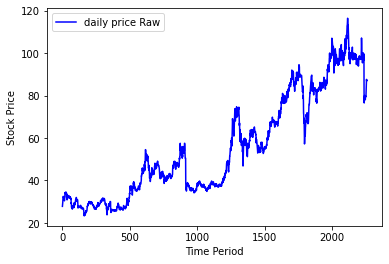

In [7]:
import matplotlib.pyplot as plt
plt.plot(close_val, color='blue', label='daily price Raw')
plt.xlabel("Time Period")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [8]:
# import necesary libraries and modules
from bigdl.orca import init_orca_context, stop_orca_context
from bigdl.orca import OrcaContext

In [9]:
# recommended to set it to True when running bigdl-chronos in Jupyter notebook 
OrcaContext.log_output = True # (this will display terminal's stdout and stderr in the Jupyter notebook).

init_orca_context(cluster_mode="local", cores=4, init_ray_on_spark=True)

Initializing orca context
Current pyspark location is : /usr/local/lib/python3.7/dist-packages/pyspark/__init__.py
Start to getOrCreate SparkContext
pyspark_submit_args is:  --driver-class-path /usr/local/lib/python3.7/dist-packages/bigdl/share/orca/lib/bigdl-orca-spark_2.4.6-0.14.0-SNAPSHOT-jar-with-dependencies.jar:/usr/local/lib/python3.7/dist-packages/bigdl/share/dllib/lib/bigdl-dllib-spark_2.4.6-0.14.0-SNAPSHOT-jar-with-dependencies.jar pyspark-shell 
[main] WARN  org.apache.hadoop.util.NativeCodeLoader  - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


2022-01-25 15:58:53,242 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-01-25 15:58:53,253 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-01-25 15:58:53,255 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
2022-01-25 15:58:53,256 Thread-3 WARN The bufferSize is set to 4000 but bufferedIo is false: false
22-01-25 15:58:53 [Thread-3] INFO  Engine$:121 - Auto detect executor number and executor cores number
22-01-25 15:58:53 [Thread-3] INFO  Engine$:123 - Executor number is 1 and executor cores number is 4



User settings:

   KMP_AFFINITY=granularity=fine,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   OMP_NUM_THREADS=1

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_HAND_THREAD=false
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_FORKJOIN_FRAMES=true
   KMP_FORKJOIN_FRAMES_MODE=3
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_ITT_PREPARE_DELAY=0
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_MWAIT_HINTS=0
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_

22-01-25 15:58:54 [Thread-3] INFO  ThreadPool$:95 - Set mkl threads to 1 on thread 16
[Thread-3] WARN  org.apache.spark.SparkContext  - Using an existing SparkContext; some configuration may not take effect.
22-01-25 15:58:54 [Thread-3] INFO  Engine$:446 - Find existing spark context. Checking the spark conf...
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.Sample
BigDLBasePickler registering: bigdl.dllib.utils.common  Sample
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.EvaluatedResult
BigDLBasePickler registering: bigdl.dllib.utils.common  EvaluatedResult
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.JTensor
BigDLBasePickler registering: bigdl.dllib.utils.common  JTensor
cls.getname: com.intel.analytics.bigdl.dllib.utils.python.api.JActivity
BigDLBasePickler registering: bigdl.dllib.utils.common  JActivity
Successfully got a SparkContext


2022-01-25 15:58:58,680	INFO services.py:1340 -- View the Ray dashboard at http://172.28.0.2:8265


{'node_ip_address': '172.28.0.2', 'raylet_ip_address': '172.28.0.2', 'redis_address': '172.28.0.2:6379', 'object_store_address': '/tmp/ray/session_2022-01-25_15-58-55_449660_799/sockets/plasma_store', 'raylet_socket_name': '/tmp/ray/session_2022-01-25_15-58-55_449660_799/sockets/raylet', 'webui_url': '172.28.0.2:8265', 'session_dir': '/tmp/ray/session_2022-01-25_15-58-55_449660_799', 'metrics_export_port': 61938, 'node_id': '5f9a9d1b308c036ce521822fc383fbb71ef7d6695012fdddd7c2a662'}


<SparkContext master=local[4] appName=pyspark-shell>

## Data Pre-processing

In [10]:
from bigdl.chronos.data import TSDataset
from sklearn.preprocessing import MinMaxScaler

df = data[['date', 'close']]
tsdata_train, _, tsdata_test = TSDataset.from_pandas(df, dt_col="date", target_col="close", with_split=True, test_ratio=0.1)
minmax_scaler = MinMaxScaler()

for tsdata in [tsdata_train, tsdata_test]:
    tsdata.scale(minmax_scaler, fit=(tsdata is tsdata_train))\
          .roll(lookback=50, horizon=1)

X_train, y_train = tsdata_train.to_numpy()
X_test, y_test = tsdata_test.to_numpy()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


((1984, 50, 1), (1984, 1, 1), (175, 50, 1), (175, 1, 1))

## Time series forecasting

In [11]:
from bigdl.chronos.forecaster.lstm_forecaster import LSTMForecaster

/usr/local/lib/python3.7/dist-packages/bigdl/chronos/forecaster/__init__.py:36: UserWarning: Please install `tensorflow<2.0.0` to use MTNetForecaster.
  warnings.warn("Please install `tensorflow<2.0.0` to use MTNetForecaster.")
/usr/local/lib/python3.7/dist-packages/bigdl/chronos/forecaster/__init__.py:41: UserWarning: Please install `prophet` to use ProphetForecaster.
  warnings.warn("Please install `prophet` to use ProphetForecaster.")
/usr/local/lib/python3.7/dist-packages/bigdl/chronos/forecaster/__init__.py:46: UserWarning: Please install `pmdarima` to use ARIMAForecaster.
  warnings.warn("Please install `pmdarima` to use ARIMAForecaster.")


In [12]:
# Hyperparameters
feature_dim = X_train.shape[-1]
target_dim = 1
hidden_dim = 10
learning_rate = 0.01
batch_size = 16
epochs = 50

In [13]:
forecaster = LSTMForecaster(past_seq_len=X_train.shape[1],
                            input_feature_num=feature_dim,
                            output_feature_num=target_dim,
                            hidden_dim=32,
                            lr=learning_rate, distributed=True
                            )

(PytorchRayWorker pid=1086) /usr/local/lib/python3.7/dist-packages/bigdl/chronos/forecaster/__init__.py:36: UserWarning: Please install `tensorflow<2.0.0` to use MTNetForecaster.
(PytorchRayWorker pid=1086)   warnings.warn("Please install `tensorflow<2.0.0` to use MTNetForecaster.")
(PytorchRayWorker pid=1086) /usr/local/lib/python3.7/dist-packages/bigdl/chronos/forecaster/__init__.py:41: UserWarning: Please install `prophet` to use ProphetForecaster.
(PytorchRayWorker pid=1086)   warnings.warn("Please install `prophet` to use ProphetForecaster.")
(PytorchRayWorker pid=1086) /usr/local/lib/python3.7/dist-packages/bigdl/chronos/forecaster/__init__.py:46: UserWarning: Please install `pmdarima` to use ARIMAForecaster.
(PytorchRayWorker pid=1086)   warnings.warn("Please install `pmdarima` to use ARIMAForecaster.")


In [14]:
forecaster.fit(data=(X_train, y_train), batch_size=batch_size, epochs=epochs)
forecaster.to_local()

(PytorchRayWorker pid=1086) [2022-01-25 15:59:12] INFO     Added key: store_based_barrier_key:1 to store for rank: 0
(PytorchRayWorker pid=1086) [2022-01-25 15:59:12] INFO     Rank 0: Completed store-based barrier for 1 nodes.
(PytorchRayWorker pid=1086) /usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
(PytorchRayWorker pid=1086)   "num_layers={}".format(dropout, num_layers))
(PytorchRayWorker pid=1086) /usr/local/lib/python3.7/dist-packages/bigdl/chronos/forecaster/utils.py:33: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warni

In [14]:
forecaster.fit(data=(X_train, y_train), batch_size=batch_size, epochs=epochs)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/configuration_validator.py:101: UserWarning: you defined a validation_step but have no val_dataloader. Skipping val loop
  rank_zero_warn(f"you defined a {step_name} but have no {loader_name}. Skipping {stage} loop")

  | Name  | Type      | Params
------------------------------------
0 | model | LSTMModel | 4.5 K 
1 | loss  | MSELoss   | 0     
------------------------------------
4.5 K     Trainable params
0         Non-trainable params
4.5 K     Total params
0.018     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 4065739793


Training: -1it [00:00, ?it/s]

In [15]:
# make prediction
y_pred = forecaster.predict(X_test)

In [16]:
y_pred_unscale = tsdata_test.unscale_numpy(y_pred)
y_test_unscale = tsdata_test.unscale_numpy(y_test)

In [17]:
from bigdl.orca.automl.metrics import Evaluator
print("mean_squared error is", Evaluator.evaluate("mse", y_test_unscale, y_pred_unscale, multioutput='uniform_average'))

mean_squared error is 5.977012544747309


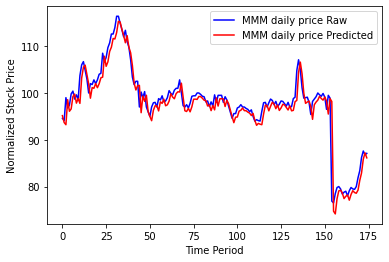

In [18]:
plt.plot(y_test_unscale[:, :, 0], color='blue', label="MMM daily price Raw")
plt.plot(y_pred_unscale[:, :, 0], color='red', label="MMM daily price Predicted")
plt.xlabel("Time Period")
plt.ylabel("Normalized Stock Price")
plt.legend()
plt.show()